# Cumulative Distribution Functions

Why not pmf?

If there are more values, their probabilities gets reduced.

In [1]:
# include packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# random numbers

rnums = np.random.randint(100, size=(1000))

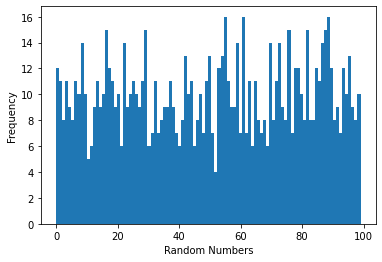

In [3]:
plt.hist(rnums, bins=100)
plt.xlabel('Random Numbers')
plt.ylabel('Frequency')
plt.show()

Binning

<pre>
Dividing the values into intervals and counting the number of values in the intervals
[1,2,3,4,5,6,7,8]
bins=4
bin1 = [1,2]; bin2 = [3,4]; bin3 = [5,6]; bin4 = [7,8]
<pre>

## Percentiles

In [4]:
# percentile

def PercentileRank(scores, yourscore):
    count = 0
    for score in scores:
        if yourscore >= score:
            count += 1
    return 100 * count / len(scores)

def Percentile(scores, percentile_rank):
    scores.sort()
    index = int(percentile_rank * (len(scores)-1) // 100)
    return scores[index]

In [5]:
scores = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [6]:
PercentileRank(scores, 5)

50.0

In [7]:
Percentile(scores, 50)

5

## CDF

CDF maps from a value to its percentile rank

In [8]:
# CDF

def EvalCDF(sample, x):
    count = 0
    for value in sample:
        if value <= x:
            count += 1
    return count / len(sample)

def CDF(sample):
    cdfdict = {}
    for value in range(min(sample)-1, max(sample)+1):
        cdfdict[value] = EvalCDF(sample, value)
    return cdfdict

In [9]:
sample = [1, 2, 2, 3, 5]
cdfdict = CDF(sample)
for key in cdfdict:
    print(f'CDF of {key}: {cdfdict[key]}')

CDF of 0: 0.0
CDF of 1: 0.2
CDF of 2: 0.6
CDF of 3: 0.8
CDF of 4: 0.8
CDF of 5: 1.0


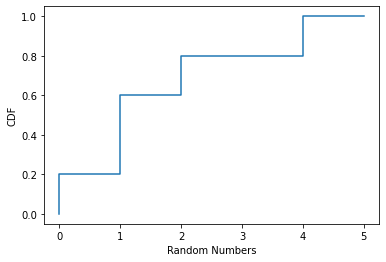

In [10]:
plt.step(x=cdfdict.keys(),y=cdfdict.values())
plt.xlabel('Random Numbers')
plt.ylabel('CDF')
plt.show()

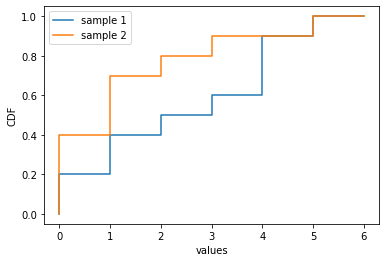

In [11]:
# comparing CDFs

sample1 = [1, 1, 2, 2, 3, 4, 5, 5, 5, 6]
sample2 = [1, 1, 1, 1, 2, 2, 2, 3, 4, 6]
cdfdict1 = CDF(sample1)
cdfdict2 = CDF(sample2)
plt.step(x=cdfdict1.keys(), y=cdfdict1.values(), label='sample 1')
plt.step(x=cdfdict2.keys(), y=cdfdict2.values(), label='sample 2')
plt.legend()
plt.xlabel('values')
plt.ylabel('CDF')
plt.show()

## Percentile-based Statistics

- 50th percentile that divides the values in half is the **median**
- Difference between 75th percentile and 25th percentile is **IQR** (interquartile range)

In [12]:
# read data
# source - https://www.kaggle.com/datasets/davidgdong/marvel-cinematic-universe-box-office-dataset

csv_file = os.getcwd() + r'/dataset/mcu_box_office.csv'
df = pd.read_csv(csv_file)

In [13]:
df.head()

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
1,The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
2,Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"
3,Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338","181,030,624","449,326,618"
4,Captain America: The First Avenger,1,7/22/2011,79,75,124,"140,000,000","65,058,524","176,654,505","370,569,776"


In [14]:
# median

Percentile(df['audience_score'].to_list(), 50)

87

Median of the audience score is 87 and is calculated by 50th percentile.

In [15]:
# interquartile range

Percentile(df['audience_score'].to_list(), 75) - Percentile(df['audience_score'].to_list(), 25)

13

IQR is used to find the spread of distribution.
Here the spread is minimum.